In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
#Load the CSV for the Cancer Data
cancer= pd.read_csv('https://raw.githubusercontent.com/SaqifTahmid/Cancer-Prediction/main/cancerrate.csv')
print(cancer)

                                     Area  Year   Case
0    Abbotsford-Mission, British Columbia  2003  408.5
1    Abbotsford-Mission, British Columbia  2004  402.4
2    Abbotsford-Mission, British Columbia  2005  417.8
3    Abbotsford-Mission, British Columbia  2006  421.9
4    Abbotsford-Mission, British Columbia  2007  446.2
..                                    ...   ...    ...
450                    Winnipeg, Manitoba  2011  517.2
451                    Winnipeg, Manitoba  2012  511.0
452                    Winnipeg, Manitoba  2013  506.4
453                    Winnipeg, Manitoba  2014  497.9
454                    Winnipeg, Manitoba  2015  494.2

[455 rows x 3 columns]


In [100]:
cancer.head()

,Area,Year,Case
0,"Abbotsford-Mission, British Columbia",2003,408.5
1,"Abbotsford-Mission, British Columbia",2004,402.4
2,"Abbotsford-Mission, British Columbia",2005,417.8
3,"Abbotsford-Mission, British Columbia",2006,421.9
4,"Abbotsford-Mission, British Columbia",2007,446.2


In [101]:
cancer.tail()

,Area,Year,Case
450,"Winnipeg, Manitoba",2011,517.2
451,"Winnipeg, Manitoba",2012,511.0
452,"Winnipeg, Manitoba",2013,506.4
453,"Winnipeg, Manitoba",2014,497.9
454,"Winnipeg, Manitoba",2015,494.2


In [102]:
cancer[cancer['Case'].isnull()]

,Area,Year,Case
190,"Montréal, Quebec",2011,NaN
191,"Montréal, Quebec",2012,NaN
192,"Montréal, Quebec",2013,NaN
193,"Montréal, Quebec",2014,NaN
194,"Montréal, Quebec",2015,NaN
229,"Ottawa-Gatineau, Ontario/Quebec",2011,NaN
230,"Ottawa-Gatineau, Ontario/Quebec",2012,NaN
231,"Ottawa-Gatineau, Ontario/Quebec",2013,NaN
232,"Ottawa-Gatineau, Ontario/Quebec",2014,NaN
233,"Ottawa-Gatineau, Ontario/Quebec",2015,NaN


In [103]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Year ~ C(Case)', data=cancer).fit()
eta_squared = sm.stats.anova_lm(model)['PR(>F)'][0]
print(f"Eta-Squared: {eta_squared}")

Eta-Squared: 0.2538223491058783


/tmp/ipykernel_1799/680420709.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = sm.stats.anova_lm(model)['PR(>F)'][0]


<Axes: xlabel='Year', ylabel='Case'>

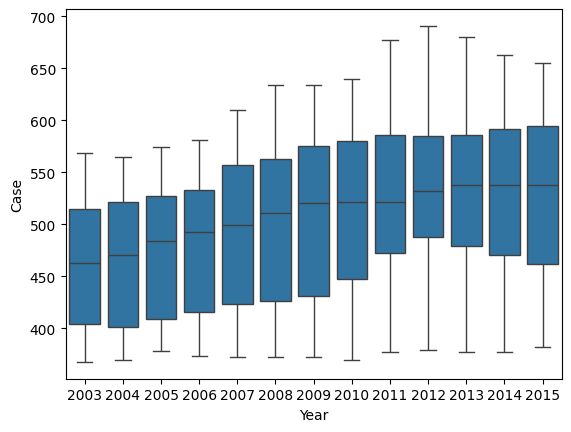

In [104]:
sns.boxplot(x = 'Year', y= 'Case', data=cancer)

In [105]:
##We have got all ranges and quantiles
## lets try to remove them using quantiles
Q1 = cancer['Case'].quantile(0.25)
Q3 = cancer['Case'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
cancer = cancer[(cancer['Case'] >= lower_bound) & (cancer['Case'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f985ed8af50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f985ed8b490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f985ed8acb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f985ed8b9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f985ed8bca0>],
 'means': []}

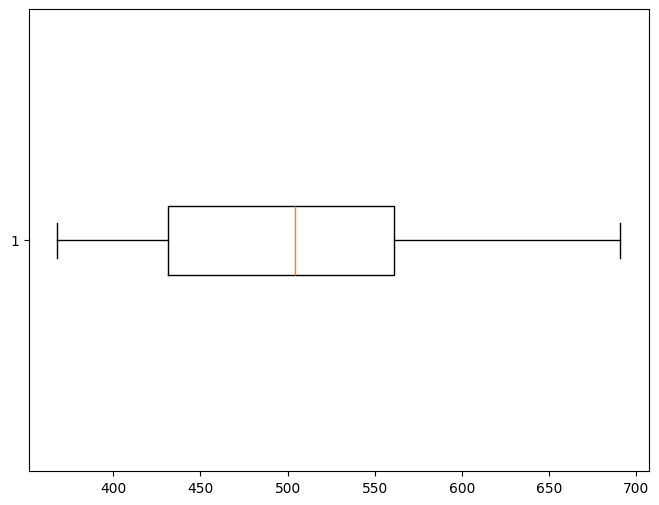

In [106]:
plt.figure(figsize=(8,6))
plt.boxplot(cancer['Case'],vert=False)

In [107]:
import statsmodels.api as sm
Y = cancer['Case']
X = cancer['Year']
X.head()

0    2003
1    2004
2    2005
3    2006
4    2007
Name: Year, dtype: int64

In [108]:
X = sm.add_constant(X)
X.head()

,const,Year
0,1.0,2003
1,1.0,2004
2,1.0,2005
3,1.0,2006
4,1.0,2007


In [109]:
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Case   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     58.10
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.69e-13
Time:                        19:25:34   Log-Likelihood:                -2386.5
No. Observations:                 420   AIC:                             4777.
Df Residuals:                     418   BIC:                             4785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.395e+04   1895.790     -7.358      0.000   -1.77e+04   -1.02e+04
Year           7.1938      0.944      7.622      0.000       5.339       9.049
==============================================================================
Omnibus:                       54.208   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.614
Skew:                           0.016   Prob(JB):                     0.000671
Kurtosis:                       2.087   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

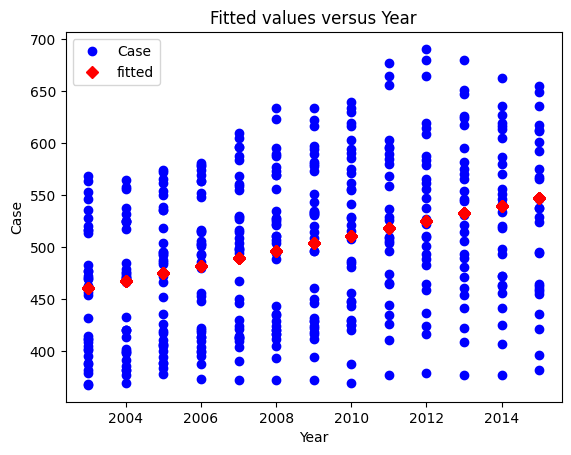

In [110]:
sm.graphics.plot_fit(model_result,1, vlines=False);

In [111]:
model_result.fittedvalues

0      460.656569
1      467.850410
2      475.044251
3      482.238091
4      489.431932
          ...    
450    518.207295
451    525.401136
452    532.594977
453    539.788817
454    546.982658
Length: 420, dtype: float64

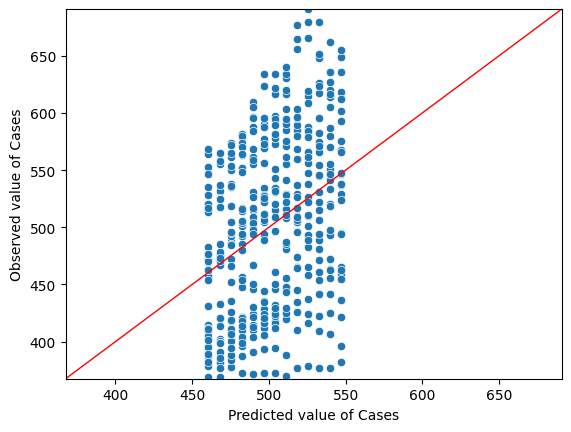

In [112]:
Y_max = Y.max()
Y_min = Y.min()

ax = sns.scatterplot(x=model_result.fittedvalues, y=Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Cases")
ax.set_ylabel("Observed value of Cases")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

In [113]:
cancer=cancer.drop('Area', axis=1)
X=cancer
X = X.drop('Case',axis=1)
y=cancer['Case']

In [114]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [115]:
from sklearn.linear_model import LinearRegression


In [116]:
regression = LinearRegression()

In [117]:
regression.fit(X_train,y_train)

LinearRegression()

In [118]:
y_pred = regression.predict(X_test)

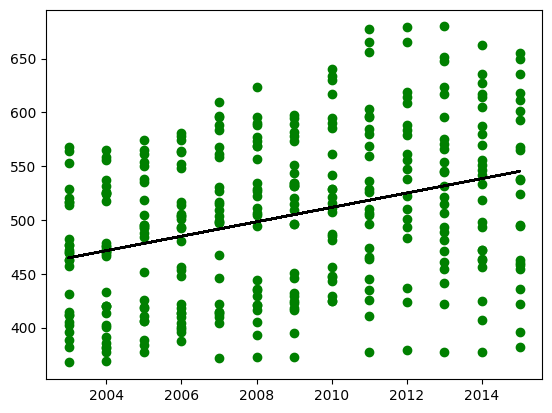

In [119]:
plt.scatter(X_train, y_train,color='g')
plt.plot(X_test, y_pred,color='k')

In [1]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score


y_pred


NameError: name 'y_test' is not defined